In [1]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 4.
# Analysis of climate data
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) Climate indices
# (2) Empirical Orthogonal Functions

# We will work with datasets from CMIP6 archive; in the examples I will use one of the following cases:
# You can download them either from the link provided in the slides, 
# or from the shared google drive link (login with your UNIMIB credentials only):
#  https://esgf-node.llnl.gov/search/cmip6/
#  https://drive.google.com/file/d/1-SOVeb7EoB_nDWcpugyNGTB6RHiRlRnF/view?usp=sharing

In [2]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# Exercise 3 (ASSIGNMENT)
# Plot the average anomaly map for the [psl] or [ts] variable, between the periods 1950-2000 and 1900-1950. 
# Free choice of the model.
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

In [3]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

import cartopy.crs as ccrs

import xarray as xr


In [4]:
# Chose model

model = 'MIROC6'   # MRI-ESM2-0 ; MIROC6 ; ACCESS-ESM1-5

In [5]:
#- Path to file
modfile1=''.join(['../Mod3_lab/ts_Amon_',model,'_historical_r1i1p1f1_gn_185001-201412.nc'])

#- explore file
d1 = xr.open_dataset(modfile1)
d1

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 128, lon: 256, time: 1980)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2018-11-30T16:15:09Z
    data_specs_version:     01.00.28
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MIROC.MIROC6...
    grid:                   native atmosphere T85 Gaussian grid
    grid_label:             gn
    history:                Thu Mar 21 11:28:13 2019: ncrcat ts_Amon_MIROC6_h...
    initialization_index:   1
    institution:            JAMSTEC (Japan Agency for Marine-Earth Science an...
    institution_id:         MIROC
    mip_era:                CMIP6
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       MIROC6
    parent_time_units:      days since 3200-1-1
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source:                 MIROC6 (2017): \naerosol: SPRINTARS6.0\natmos: CC...
    source_id:              MIROC6
    source_type:            AOGCM AER
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(06 November 2018) MD5:0728c79344e0...
    title:                  MIROC6 output prepared for CMIP6
    variable_id:            ts
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/24645cf7-2812-40bc-a320-cfc906678afe
    NCO:                    netCDF Operators version 4.7.6 (Homepage = http:/...

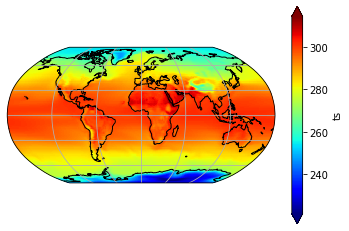

In [6]:
#- Make a visual check on time-averaged field

p0 = d1.ts.mean('time').plot(transform=ccrs.PlateCarree(),subplot_kws={'projection': ccrs.Robinson()},
                            cmap='jet',extend='both')
p0.axes.coastlines()
p0.axes.gridlines()

In [7]:
# Extract time slices

last = d1.sel(time=slice("1950-01", "1999-12"))
first = d1.sel(time=slice("1900-01", "1949-12"))

diff = last.mean(axis=0)-first.mean(axis=0)

diff

<xarray.Dataset>
Dimensions:   (bnds: 2, lat: 128, lon: 256)
Dimensions without coordinates: bnds, lat, lon
Data variables:
    lat_bnds  (bnds) float64 0.0 0.0
    lon_bnds  (bnds) float64 0.0 0.0
    ts        (lat, lon) float32 0.20755005 0.20709229 ... 0.79444885 0.7944946

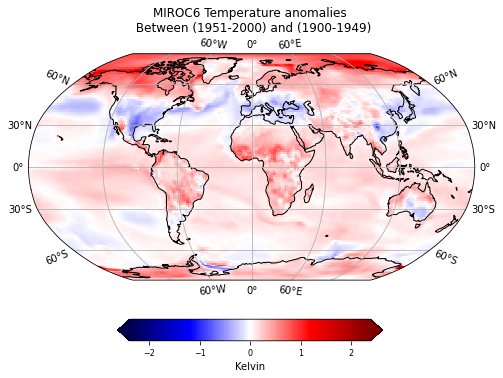

In [8]:
# Set plot

fig = plt.figure(figsize=(8,6))  # x,y(inches)

subplots = (1,1)
n_panels = subplots[0] * subplots[1]

# I will use the same colormap and scale for all plots, to facilitate comparison.
# Because we will also show the difference, we want this scale to be symmetric about zero

tmax = np.abs(diff.ts).max()
norm = mpl.colors.Normalize(vmin=-tmax,vmax=tmax) 
cmap = mpl.cm.seismic


# Temperature anomalies between the second and first half of the century

ax = fig.add_subplot(subplots[0], subplots[1], 1, projection=ccrs.Robinson())
ax.set_title(' '.join([model,'Temperature anomalies','\n','Between (1951-2000) and (1900-1949)']))
ax.set_global()
mm = ax.pcolormesh(d1.lon, d1.lat, diff.ts, \
                   transform=ccrs.PlateCarree(),cmap=cmap, norm=norm )  
ax.coastlines()
ax.gridlines(draw_labels=True)


#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Kelvin')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()